
               
#                                    DATA LOADING AND UNDERSTANDING

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import pandas as pd

df1 = pd.read_csv("/content/drive/MyDrive/ipl_matches.csv")
df1.head()


,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05/04/17,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06/04/17,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07/04/17,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08/04/17,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08/04/17,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [ ]:
df1.describe()

,id,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,0.025132,13.283069,3.350529
std,3464.478148,0.156630,23.471144,3.387963
min,1.000000,0.000000,0.000000,0.000000
25%,189.750000,0.000000,0.000000,0.000000
50%,378.500000,0.000000,0.000000,4.000000
75%,567.250000,0.000000,19.000000,6.000000
max,11415.000000,1.000000,146.000000,10.000000



                
#                    DATA CLEANING
             

In [ ]:
df1.isnull().sum()

,0
id,0
Season,0
city,7
date,0
team1,0
team2,0
toss_winner,0
toss_decision,0
result,0
dl_applied,0


In [ ]:
df1[['League', 'Year']] = df1['Season'].str.split('-', expand=True)
df1['Year'] = df1['Year'].astype(int)

In [ ]:
df1.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,League,Year
0,1,IPL-2017,Hyderabad,05/04/17,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,IPL,2017
1,2,IPL-2017,Pune,06/04/17,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,IPL,2017
2,3,IPL-2017,Rajkot,07/04/17,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,IPL,2017
3,4,IPL-2017,Indore,08/04/17,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,IPL,2017
4,5,IPL-2017,Bangalore,08/04/17,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,IPL,2017


In [ ]:
df = df1.drop(["dl_applied","umpire3","League","Season"],axis = 1)

In [ ]:
List = ["city", "winner", "player_of_match", "umpire1", "umpire2"]
for i in List :
  df[i] = df[i].fillna(df[i].mode()[0])

In [ ]:
df.isnull().sum()

,0
id,0
city,0
date,0
team1,0
team2,0
toss_winner,0
toss_decision,0
result,0
winner,0
win_by_runs,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df['date'] = pd.to_datetime(df['date'], format="%d/%m/%y" ,errors='coerce')

FINAL DATASET OVERVIEW

In [ ]:
df.head()

,id,city,date,team1,team2,toss_winner,toss_decision,result,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,Year
0,1,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,2017
1,2,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,2017
2,3,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,2017
3,4,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,2017
4,5,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,HDPK Dharmasena,C Shamshuddin,2017


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

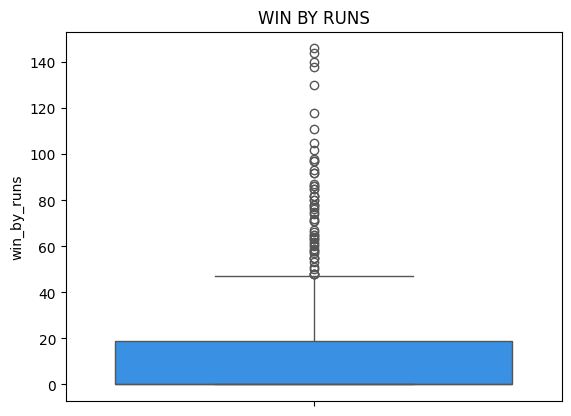

In [ ]:
sns.boxplot(y="win_by_runs",data = df ,color="dodgerblue")

plt.title("WIN BY RUNS")

plt.show()

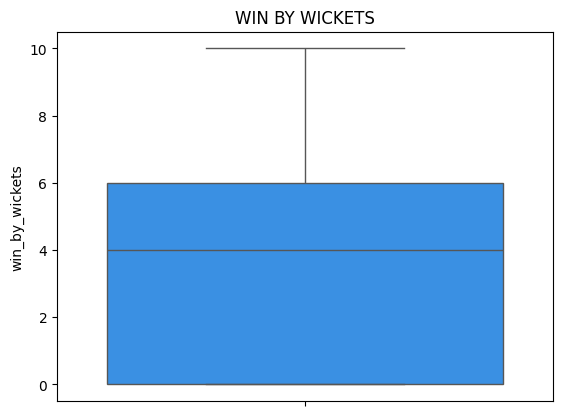

In [ ]:
sns.boxplot(y="win_by_wickets",data = df ,color="dodgerblue")

plt.title("WIN BY WICKETS")

plt.show()

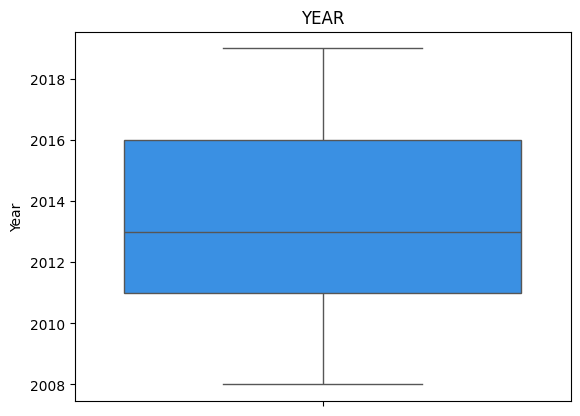

In [ ]:
sns.boxplot(y="Year",data = df ,color="dodgerblue")

plt.title("YEAR")

plt.show()


                
#                                   EXPLORATORY DATA ANALYSIS (EDA)              

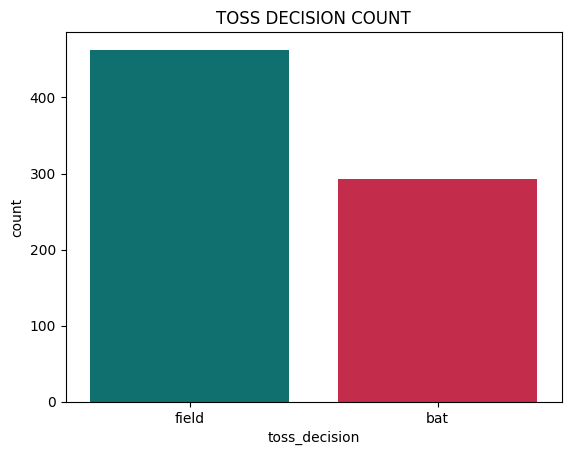

In [ ]:
sns.countplot( x = "toss_decision",data = df , hue="toss_decision",palette=["teal","crimson"])

plt.title("TOSS DECISION COUNT")

plt.show()

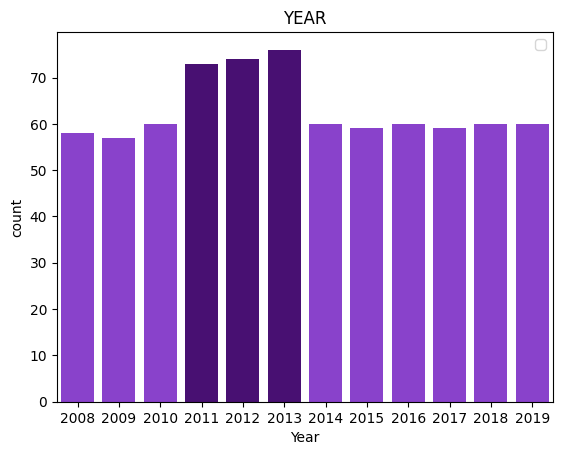

In [ ]:
color =["blueviolet","blueviolet","blueviolet","indigo","indigo","indigo","blueviolet","blueviolet","blueviolet","blueviolet","blueviolet","blueviolet"]

sns.countplot( x = "Year", data = df, hue = "Year",palette = color)

plt.title("YEAR")

plt.legend([])

plt.show()

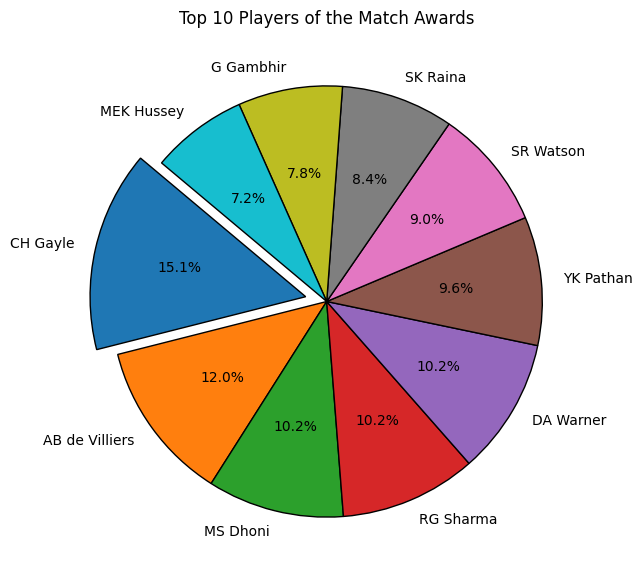

In [ ]:

top_players = df["player_of_match"].value_counts().nlargest(10)
explode = [0.1 if i == 0 else 0 for i in range(len(top_players))]
plt.figure(figsize=(7,7))
plt.pie(top_players ,labels=top_players.index , autopct="%1.1f%%" , startangle=140 , explode=explode , colors=plt.cm.tab10.colors , wedgeprops={"edgecolor":"black"})
plt.title("Top 10 Players of the Match Awards")
plt.show()


/tmp/ipython-input-2503168518.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="winner", data=df, order=df["winner"].value_counts().index, palette="viridis")


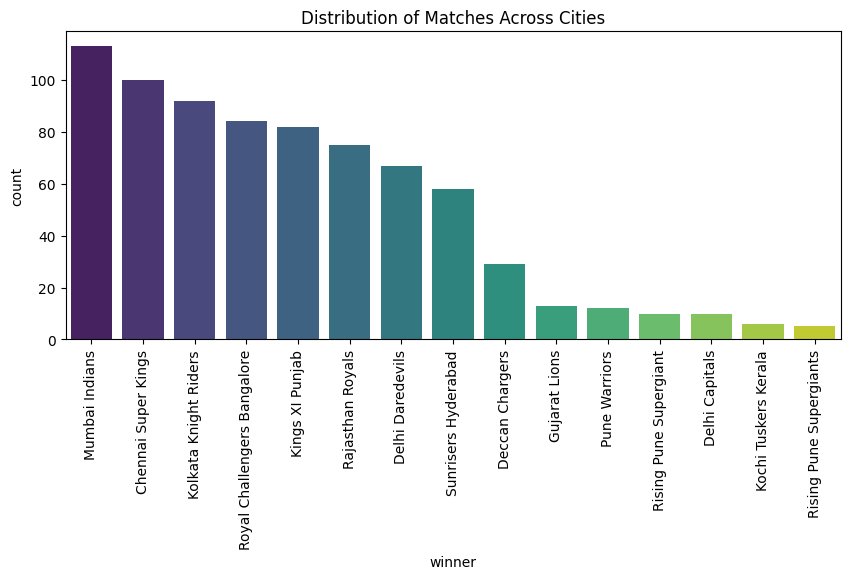

In [ ]:
plt.figure(figsize=(10,4))
sns.countplot(x="winner", data=df, order=df["winner"].value_counts().index, palette="viridis")
plt.xticks(rotation=90)
plt.title("Distribution of Matches Across Cities")
plt.show()


/tmp/ipython-input-452044932.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="city", data=df, order=df["city"].value_counts().index, palette="cividis")


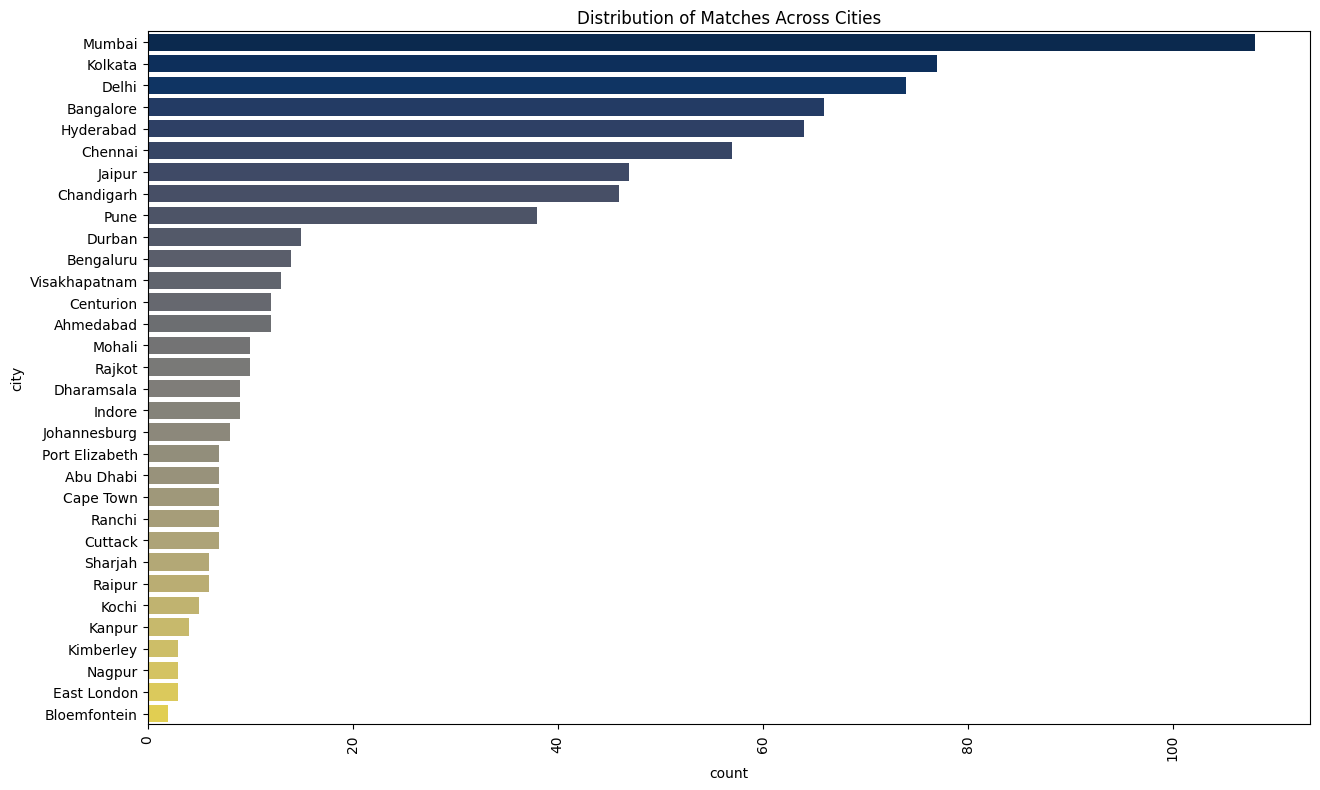

In [ ]:
plt.figure(figsize=(15,9))
sns.countplot(y="city", data=df, order=df["city"].value_counts().index, palette="cividis")
plt.xticks(rotation=90)
plt.title("Distribution of Matches Across Cities")
plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder
L = LabelEncoder()

In [ ]:
List1 = ["winner","team1","team2","toss_winner","toss_decision"]
for i in List1:
  df[i]= L.fit_transform(df[i])

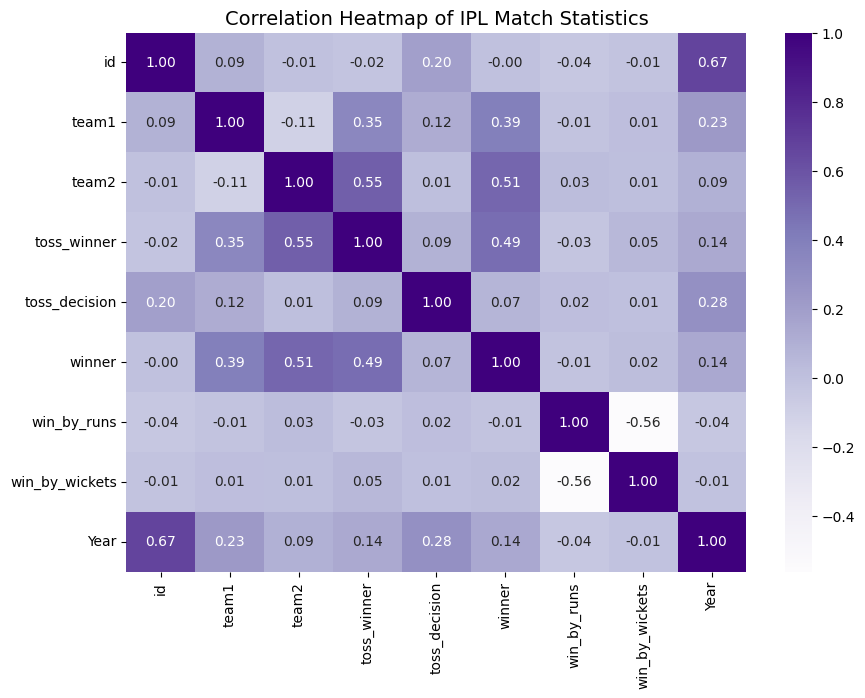

In [ ]:
numeric = df.select_dtypes(include='number')

plt.figure(figsize=(10,7))
sns.heatmap(numeric.corr(), annot=True, cmap="Purples", fmt=".2f")
plt.title("Correlation Heatmap of IPL Match Statistics", fontsize=14)
plt.show()



                
#                                                 DATA PREPROCESSING


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
X = df.drop(columns=['winner', 'id', 'date','umpire1','umpire2','player_of_match'])
y = df['winner']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
X_encoded = pd.get_dummies(X, drop_first=True)

In [ ]:
X_train_encoded = pd.get_dummies(X_train, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, drop_first=True)

X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)



#                MODEL TRAINING


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

LOGISTIC REGRESSION

In [ ]:
LOGIC = LogisticRegression()

LOGIC.fit(X_train_scaled, y_train)

y_pred = LOGIC.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))


Accuracy: 0.17763157894736842

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.05      0.10        20
           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00        13
           4       0.00      0.00      0.00         3
           5       0.25      0.06      0.10        16
           6       1.00      1.00      1.00         1
           7       0.00      0.00      0.00        19
           8       0.17      1.00      0.28        23
           9       0.00      0.00      0.00         2
          10       0.33      0.07      0.11        15
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00        17
          14       0.00      0.00      0.00        12

    accuracy                           0.18       152
   macro avg       0.18  

SVM

In [ ]:
SVM = SVC()

SVM.fit(X_train_scaled, y_train)

y_pred = SVM.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))


Accuracy: 0.28289473684210525

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.40      0.53        20
           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00        13
           4       0.00      0.00      0.00         3
           5       0.33      0.19      0.24        16
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00        19
           8       0.20      0.74      0.32        23
           9       0.00      0.00      0.00         2
          10       0.62      0.53      0.57        15
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00        17
          14       0.64      0.58      0.61        12

    accuracy                           0.28       152
   macro avg       0.17  

KNN

In [ ]:
KNN = KNeighborsClassifier()

KNN.fit(X_train_scaled, y_train)

y_pred = KNN.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))

Accuracy: 0.39473684210526316

Classification Report:
               precision    recall  f1-score   support

           0       0.40      0.50      0.44        20
           1       0.20      0.33      0.25         6
           2       0.00      0.00      0.00         2
           3       0.62      0.38      0.48        13
           4       0.00      0.00      0.00         3
           5       0.60      0.38      0.46        16
           6       0.00      0.00      0.00         1
           7       0.42      0.53      0.47        19
           8       0.35      0.61      0.44        23
           9       0.00      0.00      0.00         2
          10       0.62      0.53      0.57        15
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00        17
          14       0.36      0.42      0.38        12

    accuracy                           0.39       152
   macro avg       0.24  

DECISION TREE

In [ ]:
TREE = DecisionTreeClassifier()

TREE.fit(X_train_scaled, y_train)

y_pred = TREE.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))

Accuracy: 0.8421052631578947

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.65      0.76        20
           1       0.86      1.00      0.92         6
           2       0.25      0.50      0.33         2
           3       0.90      0.69      0.78        13
           4       1.00      1.00      1.00         3
           5       0.57      0.81      0.67        16
           6       1.00      1.00      1.00         1
           7       0.95      0.95      0.95        19
           8       0.95      0.87      0.91        23
           9       1.00      1.00      1.00         2
          10       0.94      1.00      0.97        15
          11       0.50      0.50      0.50         2
          12       0.00      0.00      0.00         1
          13       0.94      0.88      0.91        17
          14       0.85      0.92      0.88        12

    accuracy                           0.84       152
   macro avg       0.77   

RANDOM FOREST

In [ ]:
RF = RandomForestClassifier()

RF.fit(X_train_scaled, y_train)

y_pred = RF.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))

Accuracy: 0.7171052631578947

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.95      0.88        20
           1       0.83      0.83      0.83         6
           2       0.33      0.50      0.40         2
           3       0.75      0.69      0.72        13
           4       1.00      0.67      0.80         3
           5       0.64      0.56      0.60        16
           6       0.00      0.00      0.00         1
           7       0.79      0.79      0.79        19
           8       0.59      0.87      0.70        23
           9       0.40      1.00      0.57         2
          10       0.78      0.47      0.58        15
          11       0.50      0.50      0.50         2
          12       0.00      0.00      0.00         1
          13       0.82      0.53      0.64        17
          14       0.91      0.83      0.87        12

    accuracy                           0.72       152
   macro avg       0.61   

XG BOOST

In [ ]:
XG = XGBClassifier()
XG.fit(X_train_scaled, y_train)

y_pred = XG.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))

Accuracy: 0.9539473684210527

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00         6
           2       1.00      0.50      0.67         2
           3       1.00      0.77      0.87        13
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00        16
           6       1.00      1.00      1.00         1
           7       0.95      1.00      0.97        19
           8       0.85      1.00      0.92        23
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00        15
          11       1.00      0.50      0.67         2
          12       0.00      0.00      0.00         1
          13       1.00      1.00      1.00        17
          14       0.85      0.92      0.88        12

    accuracy                           0.95       152
   macro avg       0.91   


#                                                 MODEL EVALUATION
             

                 Model  Accuracy  Precision    Recall  F1 Score
5              XGBoost  0.953947   0.952608  0.953947  0.948709
3        Decision Tree  0.855263   0.888281  0.855263  0.861308
4        Random Forest  0.717105   0.737358  0.717105  0.712156
2                  KNN  0.394737   0.371106  0.394737  0.369804
1                  SVM  0.282895   0.282311  0.282895  0.248420
0  Logistic Regression  0.177632   0.222406  0.177632  0.083568
BEST MODEL: XGBoost


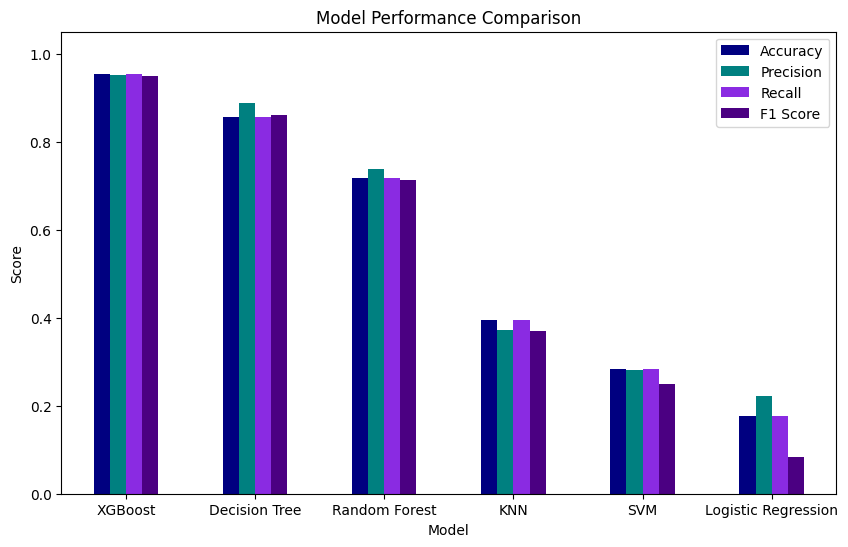

In [ ]:
models = {"Logistic Regression": LogisticRegression(),
                          "SVM": SVC(),
                          "KNN": KNeighborsClassifier(),
                "Decision Tree": DecisionTreeClassifier(),
                "Random Forest": RandomForestClassifier(),
                      "XGBoost": XGBClassifier()}

results = []
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    results.append({ "Model": name,
                  "Accuracy": accuracy_score(y_test, y_pred),
                 "Precision": precision_score(y_test, y_pred, average="weighted", zero_division=0),
                    "Recall": recall_score(y_test, y_pred, average="weighted", zero_division=0),
                  "F1 Score": f1_score(y_test, y_pred, average="weighted", zero_division=0)})

comparison_df = pd.DataFrame(results).sort_values(by="F1 Score", ascending=False)
print(comparison_df)
print("BEST MODEL:", comparison_df.iloc[0]["Model"])

colors = ["navy","teal","blueviolet","indigo"]

comparison_df.set_index("Model")[["Accuracy", "Precision", "Recall", "F1 Score"]].plot(kind="bar", figsize=(10,6), rot=0,  color=colors)
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.ylim(0, 1.05)
plt.show()


## GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)


param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_scaled, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best CV Accuracy:", grid_search.best_score_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

print("\nTest Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))


Fitting 3 folds for each of 48 candidates, totalling 144 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [14:54:20] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
Best CV Accuracy: 0.9602564734085348

Test Accuracy: 0.9473684210526315

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00         6
           2       1.00      0.50      0.67         2
           3       1.00      0.77      0.87        13
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00        16
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00        19
           8       0.77      1.00      0.87        23
           9       1.00      0.50      0.67         2
          10       1.00      1.00      1.00        15
          11       1.00      0.50      0.67         2
          12       0.00      0.00      0.00         1
          13       1.00   

# RandomizedSearchCV

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report

xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

param_dist = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.7, 0.8, 1],
    'colsample_bytree': [0.7, 0.8, 1]
}

random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=20,
    scoring='accuracy',
    cv=3,
    n_jobs=-1,
    random_state=42,
    verbose=1
)

random_search.fit(X_train_scaled, y_train)

print("Best Parameters:", random_search.best_params_)
print("Best CV Accuracy:", random_search.best_score_)

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

print("\nTest Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))


Fitting 3 folds for each of 20 candidates, totalling 60 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [14:55:06] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Parameters: {'subsample': 0.8, 'n_estimators': 400, 'max_depth': 3, 'learning_rate': 0.2, 'colsample_bytree': 0.8}
Best CV Accuracy: 0.9586063083920333

Test Accuracy: 0.9539473684210527

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00         6
           2       1.00      0.50      0.67         2
           3       1.00      0.77      0.87        13
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00        16
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00        19
           8       0.82      1.00      0.90        23
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00        15
          11       1.00      0.50      0.67         2
          12       0.00      0.00      0.00         1
          13       0.94   

In [ ]:
df.head()

,id,city,date,team1,team2,toss_winner,toss_decision,result,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,Year
0,1,Hyderabad,2017-04-05,14,13,13,1,normal,14,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,2017
1,2,Pune,2017-04-06,8,11,11,1,normal,11,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,2017
2,3,Rajkot,2017-04-07,4,7,7,1,normal,7,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,2017
3,4,Indore,2017-04-08,11,5,5,1,normal,5,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,2017
4,5,Bangalore,2017-04-08,13,3,13,0,normal,13,15,0,KM Jadhav,M Chinnaswamy Stadium,HDPK Dharmasena,C Shamshuddin,2017


In [ ]:
team_mapping = {
    1: 'Chennai Super Kings',
    2: 'Delhi Capitals',
    3: 'Kolkata Knight Riders',
    4: 'Mumbai Indians',
    5: 'Kings XI Punjab',
    6: 'Rajasthan Royals',
    7: 'Royal Challengers Bangalore',
    8: 'Sunrisers Hyderabad',
    9: 'Gujarat Titans',
    10: 'Lucknow Super Giants',
    11: 'Deccan Chargers',
    12: 'Pune Warriors',
    13: 'Rising Pune Supergiant',
    14: 'Kochi Tuskers Kerala'
}

new_pred = {
    "Year": [2020],
    "city": [1],
    "team1": [13],
    "team2": [11],
    "toss_winner": [9],
    "toss_decision": [1],
    "result": [2],
    "win_by_runs": [35],
    "win_by_wickets": [0],
    "venue": [1]
}

new_preds = pd.DataFrame(new_pred)


new_preds_encoded = pd.get_dummies(new_preds, drop_first=True)
new_preds_encoded = new_preds_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)
new_preds_scaled = scaler.transform(new_preds_encoded)


y_proba = best_model.predict_proba(new_preds_scaled)[0]


teams_in_match = [new_pred['team1'][0], new_pred['team2'][0]]
team_probs = {team: y_proba[team-1] for team in teams_in_match}
predicted_team_id = max(team_probs, key=team_probs.get)

predicted_team = team_mapping[predicted_team_id]

print("Predicted winner:", predicted_team)


Predicted winner: Deccan Chargers
